# Meta - Data Mining Challenge
Daniel Korpon - Sr. Data Scientist / Applied Mathematician

## Overview and Background
This notebooks is intended to outline the process and steps I took to complete the data mining challenge. <br>
Sections include: **ETL**, **Data Analysis**, **Classification**, and **Predictions**.

## Import packages needed

In [1]:
import sys; sys.path.append("../../")
import tara.meta as meta
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Extract, Transform & Load

## Read Data
This next section will pull the data into a data frame and begin cleaning it for analysis.

In [2]:
data = meta.process_data()

Run a quick line of code to see a few of the records. 
I transpose the data so that I can see all to column easily.

In [3]:
data.head().T

,1,2,3,4,5
entity,US Customs and Border Protection,Click2Gov,SingHealth,Quest Diagnostics,Australian National University
alternative_name,NaN,NaN,NaN,NaN,NaN
records_lost,100000.0,300000.0,1500000.0,11900000.0,200000.0
year,2019,2018,2018,2019,2019
story,June 2019. Photos of travellers' faces and lic...,"Dec 2018. Vulnerabilities in Click2Gov, a type...",July 2018. Hackers stole personal details of 1...,June 2019. One of the biggest blood testing pr...,June 2019. A hacker accessed personal informat...
sector,government,financial,healthcare,healthcare,academic
method,hacked,hacked,hacked,poor security,hacked
interesting_story,y,NaN,NaN,NaN,NaN
data_sensitivity,2,3,4,4,4
displayed_records,NaN,NaN,NaN,NaN,NaN


## Describe Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 1 to 339
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   entity             338 non-null    object        
 1   alternative_name   135 non-null    object        
 2   records_lost       338 non-null    float64       
 3   year               338 non-null    object        
 4   story              338 non-null    object        
 5   sector             338 non-null    object        
 6   method             338 non-null    object        
 7   interesting_story  69 non-null     object        
 8   data_sensitivity   338 non-null    object        
 9   displayed_records  32 non-null     object        
 10  source_name        338 non-null    object        
 11  1st_source_link    338 non-null    object        
 12  2nd_source_link    32 non-null     object        
 13  entity_rollup      338 non-null    object        
 14  month     

## Create Data Set ready for Analysis

In [8]:
analysis_data = meta.create_analysis_data(data)

## View the Data

In [14]:
analysis_data.head().T

,1,2,3,4,5
entity_rollup,1.0,2.0,3.0,4.0,5.0
year,2019.0,2018.0,2018.0,2019.0,2019.0
records_lost,100000.0,300000.0,1500000.0,11900000.0,200000.0
sector,1.0,2.0,3.0,3.0,4.0
method,1.0,1.0,1.0,2.0,1.0
interesting_story,1.0,0.0,0.0,0.0,0.0
displayed_records,0.0,0.0,0.0,0.0,0.0
data_sensitivity,2.0,3.0,4.0,4.0,4.0
month,6.0,12.0,7.0,6.0,6.0
is_web,0.0,0.0,0.0,0.0,0.0


## Create Graph Data
Use these cells to generate the data needed to view variables of interest plotted against time.

In [15]:
graph_data = meta.generate_graph_data(data)
graph_data.keys()

dict_keys(['year', 'entity', 'method', 'source', 'sensativity'])

The keys above are examples of grouping data by a given feature.  Replace the text below with any key listed above to graph it.
* Note: for features with a number of values (e.g. entity) uncomment the plt.xticks line to rotate the x-axis lables 90 degrees.

## Graphs
View the data in graph form.

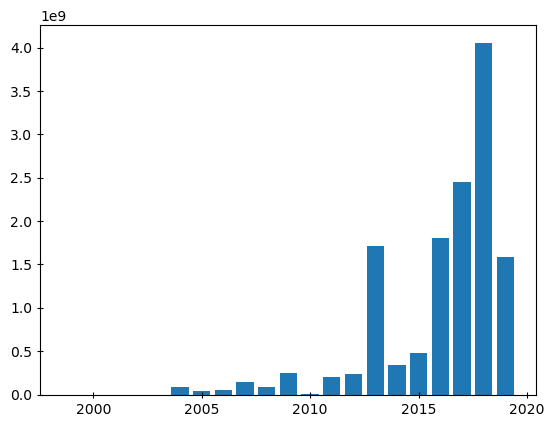

In [10]:
graph_key = "year"
graph_df = graph_data[graph_key]
plt.bar(graph_df.index,graph_df["records_lost"].values)
plt.tick_params(which="major",tickdir="inout",length=5)
#plt.xticks(rotation=90)

# Build Models
Use the frame work below to build logit models, time series forecasts and other models.

1. First start by creating a usable data set by running the create_analysis_data function

In [11]:
analysis_data = meta.create_analysis_data(data)

In [12]:
features = ["displayed_records", 'data_sensitivity','interesting_story']
split_data = meta.split_data(analysis_data, features)
model_output = meta.build_logit(split_data)
meta.print_out_logit_results(model_output)

model LogisticRegression()
d_var ['displayed_records', 'data_sensitivity']
d_coef [0.09822306683534968, 0.2894717294769536]
intercept [-2.11524469]
model_words f(x) = 0.0982 * displayed_records 0.2895 * data_sensitivity -2.1152
accuracy_score 0.7647058823529411
confusion_matrix       No  Yes
No   216    0
Yes   53    0
confusion_pct            No  Yes
No   0.802974  0.0
Yes  0.197026  0.0
confusion_narrative Per the confusion matrix, the amount of items that were correctly predicted were 216 or 0.8029739776951673.
    The amount of predictions were predicted to be Yes but were actually No was: 0 or 0.0.
    The amount of predictions were predicted to be No but were actually Yes was: 53 or 0.1970260223048327
